# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# The normal distribution test:

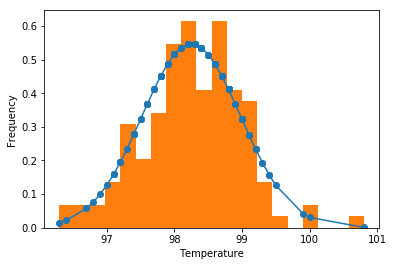

NormaltestResult(statistic=2.7038014333192359, pvalue=0.25874798634882118)

In [2]:
x=df.sort_values("temperature",axis=0)
t=x["temperature"]
#print(np.mean(t))

plot_fit = stats.norm.pdf(t, np.mean(t), np.std(t)) 
plt.plot(t,plot_fit,'-o')
plt.hist(df.temperature, bins = 20 ,normed = True)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()
stats.normaltest(t)

To check if the distribution of temperature is normal, it is always better to visualize it. We plot the histogram of the values and plot the fitted values to obtain a normal distribution. We see that there are a few outliers in the distribution on the right side but still it correlates as a normal distribution.  

Performing the Normaltest using Scipy's normal function and we obtain the p value of 0.25. Assuming the statistical significance to be 0.05 and the Null hypothesis being the distribution is normal. We can accept the Null hypothesis as the obtained p-value is greater than 0.05 which can also confirm the normal distribution.

In [3]:
#Question 2:  
no_of_samples=df["temperature"].count()
print(no_of_samples)

130


We see the sample size is n= 130 and as a general rule of thumb inorder for CLT to be validated 
it is necessary for n>30. Hence the sample size is compartively large.

#Question 3 
HO: The true population mean is 98.6 degrees F (Null hypothesis)
H1: The true population mean is not 98.6 degrees F (Alternative hypothesis)

Alternatively we can state that,
HO: μ1 = μ2
H1: μ1 ≠ μ2

In [4]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
t_score=ttest_1samp(t,98.6)
t_score_abs=abs(t_score[0])
t_score_p_abs=abs(t_score[1])
z_score=ztest(t,value=98.6)
z_score_abs=abs(z_score[0])
p_value_abs=abs(z_score[1])
print("The z score is given by: %F and the p-value is given by %6.9F"%(z_score_abs,p_value_abs))
print("The t score is given by: %F and the p-value is given by %6.9F"%(t_score_abs,t_score_p_abs))

The z score is given by: 5.454823 and the p-value is given by 0.000000049
The t score is given by: 5.454823 and the p-value is given by 0.000000241


Choosing one sample test vs two sample test:

The problem defined has a single sample and we need to test against the population mean and hence we would use a one sample test as against the two sample test. 

T-test vs Z-test:

T-test is chosen and best suited when n<30 and hence we can choose z-test for this particular distribution.Also here we are comparing the mean of the population against a predetermined value i.e. 98.6 and it is best to use  z-test. T- test is more useful when we compare the means of two sample distributions and check to see if there is a difference between them. 

The p value is 0.000000049 which is less than the usual significance level 0.05 and hence we can reject the Null hypothesis and say that the population mean is not 98.6 

Trying the t-test: Since we are comparing the mean value to a reference number, the calculation of both z score and t score remains same and hence value remains same. However the p-value differs slighlty from the other. 


In [5]:
#Question 4:
#For a 95% Confidence Interval the Confidence interval can be computed as:
variance_=np.std(t)/np.sqrt(no_of_samples)
mean_=np.mean(t)
confidence_interval = stats.norm.interval(0.95, loc=mean_, scale=variance_)
print("The Confidence Interval Lies between %F and %F"%(confidence_interval[0],confidence_interval[1]))

The Confidence Interval Lies between 98.123682 and 98.374779


Any temperatures out of this range should be considered abnormal.

Question 5:
Here we use t-test statistic because we want to compare the mean of two groups involved, the male and the female group and it is better to use a t-test.

In [6]:
temp_male=df.temperature[df.gender=='M']
female_temp=df.temperature[df.gender=='F']
ttest_ind(temp_male,female_temp)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

Considering the Null hypothesis that there is no difference between the two groups, the p-value observed is lesser than the significance level and hence we can reject the Null hypothesis saying that there is a difference in the body temperature amongst men and women.